In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
# Data citation: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand 
#                prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
# data source website: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url, sep = ",", encoding = "unicode_escape")
data.replace(["Spring", "Summer", "Autumn", "Winter"], [1,1,0,0], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   int64  
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes


In [4]:
X = data[["Rainfall(mm)", "Seasons"]].to_numpy()
X = np.append(X, np.ones((X.shape[0], 1)), axis = 1)
y = data[["Rented Bike Count"]].to_numpy()

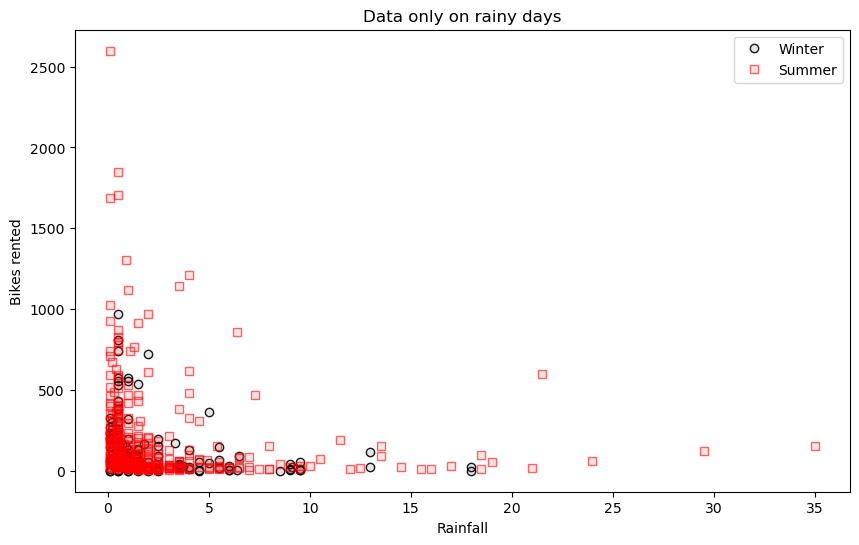

In [5]:
X_norain = X[X[:,0]>0,:]
y_norain = y[X[:,0]>0,:]

plt.figure(figsize = (10,6))
plt.plot(X_norain[X_norain[:,1]==0,0], y_norain[X_norain[:,1]==0], "o",
        markerfacecolor = (0,0,0,0.1), markeredgecolor = (0,0,0,0.9), label = "Winter")
plt.plot(X_norain[X_norain[:,1]==1,0], y_norain[X_norain[:,1]==1], "s",
        markerfacecolor = (1,0,0,0.1), markeredgecolor = (1,0,0,0.6), label = "Summer")
plt.xlabel("Rainfall")
plt.ylabel("Bikes rented")
plt.title("Data only on rainy days")
plt.legend()
plt.show()

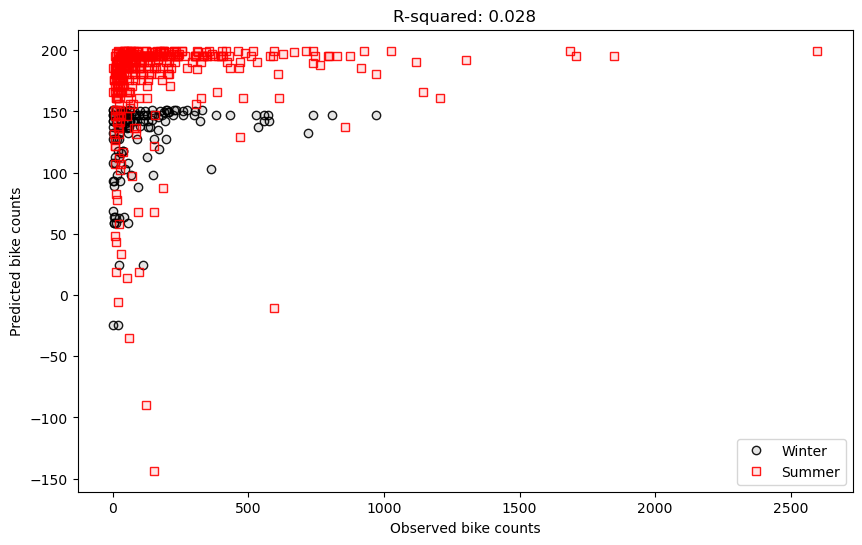

In [6]:
beta_norain = np.linalg.lstsq(X_norain, y_norain, rcond = None)
yhat_norain = X_norain @ beta_norain[0]
modelfit = np.corrcoef(y_norain.T, yhat_norain.T)[0,1]**2

plt.figure(figsize = (10,6))
plt.plot(y_norain[X_norain[:,1]==0], yhat_norain[X_norain[:,1]==0], "o",
        markerfacecolor = (0,0,0,0.1), markeredgecolor = (0,0,0,0.9), label = "Winter")
plt.plot(y_norain[X_norain[:,1]==1], yhat_norain[X_norain[:,1]==1], "s",
        markerfacecolor = (1,0,0,0.1), markeredgecolor = (1,0,0,0.9), label = "Summer")
plt.xlabel("Observed bike counts")
plt.ylabel("Predicted bike counts")
plt.title(f"R-squared: {modelfit:.3f}")
plt.legend()
plt.show()

# Exercise 2

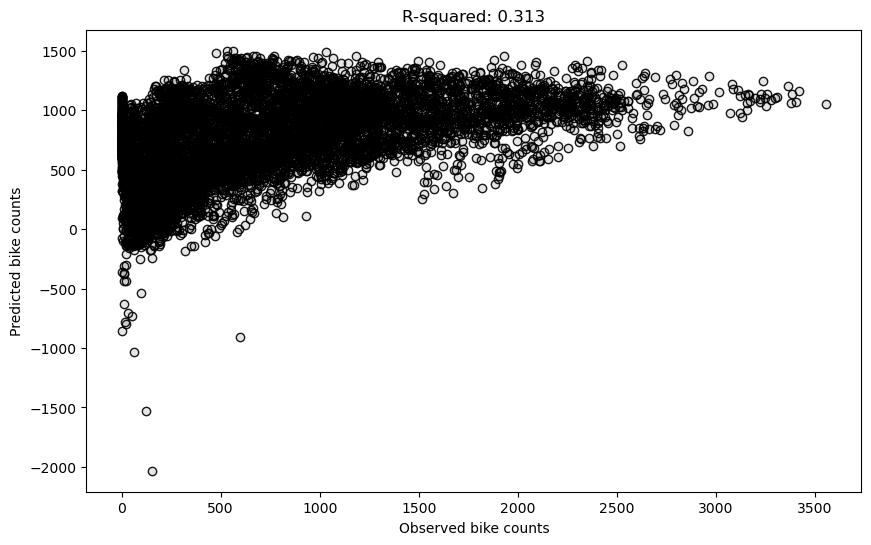

In [7]:
X = data[["Rainfall(mm)", "Temperature(°C)"]].to_numpy()
X = np.append(X, np.ones((X.shape[0],1)), axis = 1)
beta = np.linalg.lstsq(X, y, rcond = None)
yhat = X @ beta[0]
modelfit = np.corrcoef(y.T, yhat.T)[0,1]**2

plt.figure(figsize = (10,6))
plt.plot(y, yhat, "o", markerfacecolor = (0,0,0,0.1), markeredgecolor = (0,0,0,0.9))
plt.xlabel("Observed bike counts")
plt.ylabel("Predicted bike counts")
plt.title(f"R-squared: {modelfit:.3f}")
plt.savefig('Figure_12_09.png',dpi=300)
plt.show()

# Exercise 3

In [8]:
combo = 4.0 * X[:,0] + 0.4 * X[:,1]
X_m = data[["Rainfall(mm)", "Temperature(°C)"]].to_numpy()
X_m = np.append(X_m, np.ones((X_m.shape[0], 1)), axis = 1)
X_m = np.append(X_m, combo.reshape(-1,1), axis = 1)

print(f"Design matrix size: {X_m.shape}")
print(f"Design matrix rank: {np.linalg.matrix_rank(X_m)}")

Design matrix size: (8760, 4)
Design matrix rank: 3


In [9]:
oSettings = np.seterr()
np.seterr(all = "ignore")
print("Design matrix correlation matrix:")
print(np.round(np.corrcoef(X_m.T), 5))
np.seterr(**oSettings);

Design matrix correlation matrix:
[[1.      0.05028     nan 0.7057 ]
 [0.05028 1.          nan 0.74309]
 [    nan     nan     nan     nan]
 [0.7057  0.74309     nan 1.     ]]


In [10]:
pd.DataFrame(X_m, columns = ["Rain", "Temp", "Int", "Combo"]).corr()

,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


In [11]:
X_leftinv = np.linalg.inv(X_m.T @ X_m) @ X_m.T
beta1 = X_leftinv @ y
yhat = X_m @ beta1
fit1 = np.corrcoef(y.T, yhat.T)[0,1]**2
print(fit1)

0.09902800939426011


In [12]:
beta2 = np.linalg.lstsq(X_m, y, rcond = None)
yhat = X_m @ beta2[0]
fit2 = np.corrcoef(y.T, yhat.T)[0,1]**2
print(fit2)

0.3126481542486901


In [13]:
X_df = pd.DataFrame(X_m)
X_df = sm.add_constant(X_df)
Y_df = data["Rented Bike Count"]
model = sm.OLS(Y_df, X_df).fit()
beta3 = model.params.values
fit3 = model.rsquared
print(fit3)

0.3126481542486901


In [14]:
print('MODEL FIT TO DATA:')
print(f'  Left-inverse: {fit1:.4f}')
print(f'  np lstsqr   : {fit2:.4f}')
print(f'  statsmodels : {fit3:.4f}')

print(' ')
print('BETA COEFFICIENTS:')
print(f'  Left-inverse: {np.round(beta1.T,3)}')
print(f'  np lstsqr   : {np.round(beta2[0].T,3)}')
print(f'  statsmodels : {np.round(beta3.T,3)}')

MODEL FIT TO DATA:
  Left-inverse: 0.0990
  np lstsqr   : 0.3126
  statsmodels : 0.3126
 
BETA COEFFICIENTS:
  Left-inverse: [[2345.142  124.274  337.483 -384.514]]
  np lstsqr   : [[ -8.567  37.239 337.483 -19.374]]
  statsmodels : [ -8.567  37.239 337.483 -19.374]


- Notice that manually computing the coefficients provides a much worse result because of the rank-deficient design matrix

# Exercise 4

In [22]:
chapter_13 = False
gs = np.linspace(0, 0.2, 40)
r2s = np.zeros(gs.shape)
r2sm = np.zeros(gs.shape)

for i in range(len(gs)):
    l = gs[i] * np.linalg.norm(X, "fro")**2
    if chapter_13: l = gs[i] * np.mean(np.linalg.eig(X.T @ X)[0])
    leftinv = np.linalg.inv(X.T @ X + l * np.eye(X.shape[1])) @ X.T
    beta = leftinv @ y
    yhat = X @ beta
    r2s[i] = np.corrcoef(y.T, yhat.T)[0,1]**2
    
    l = gs[i] * np.linalg.norm(X_m, "fro")**2
    if chapter_13: l = gs[i] * np.mean(np.linalg.eig(X_m.T @ X_m)[0])
    leftinv = np.linalg.inv(X_m.T @ X_m + l * np.eye(X_m.shape[1])) @ X_m.T
    beta = leftinv @ y
    yhat = X_m @ beta
    r2sm[i] = np.corrcoef(y.T, yhat.T)[0,1]**2

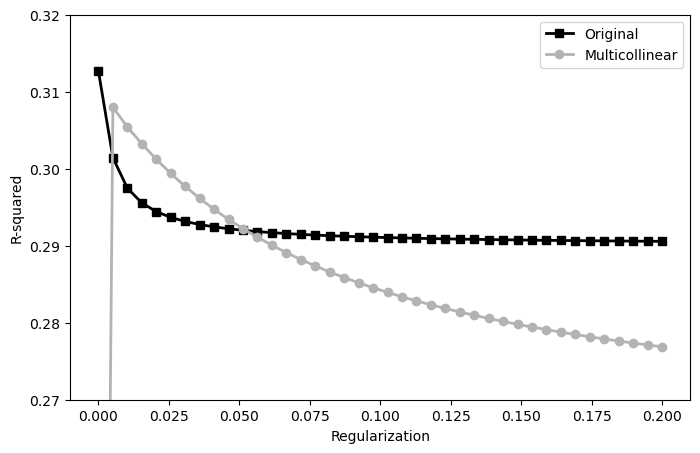

In [24]:
plt.figure(figsize = (8,5))
plt.plot(gs, r2s, "ks-", linewidth = 2, label = "Original")
plt.plot(gs, r2sm, "o-", linewidth = 2, label = "Multicollinear", color = 3*[0.7])
plt.xlabel("Regularization")
plt.ylabel("R-squared")
plt.ylim([.27,.32])
plt.legend()
plt.savefig('Figure_12_10.png',dpi=300)
plt.show()

- In theory, regularization should increase the stability of the parameters that we predict using a rank-deficient matrix, but it's hard to tell whether this makes any impact without looking at how the model performs out or sample of repeatedly predicting models
- Interestingly, regularization has diminishing effects on the full rank model

# Exercise 5

In [26]:
# Data from polynomial example
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]
N = len(year)

C:\Users\rufus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


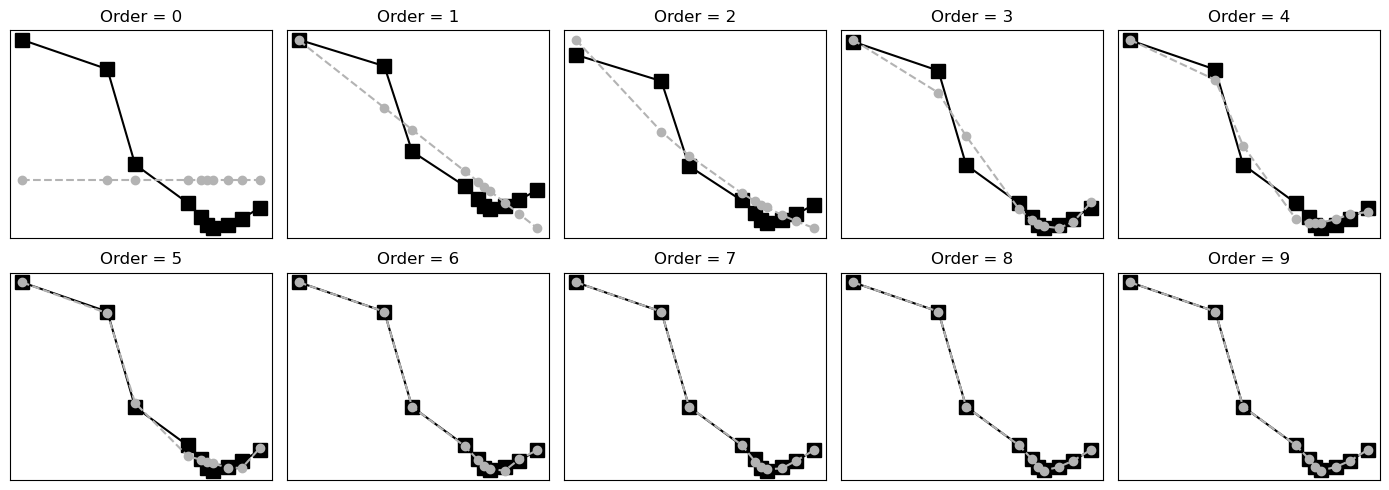

In [27]:
fig, ax = plt.subplots(2, 5, figsize = (14,5))
ax = ax.flatten()

for i in range(N):
    beta = np.polyfit(year, doubleTime, i)
    yhat = np.polyval(beta, year)
    ax[i].plot(year, doubleTime, "ks-", markersize = 10)
    ax[i].plot(year, yhat, "o--", color = 3*[0.7])
    ax[i].set(xticks = [], yticks = [])
    ax[i].set_title(f"Order = {i}")
    
plt.tight_layout()
plt.savefig('Figure_12_11.png',dpi=300)
plt.show()

# Exercise 6

# Exercise 7